In [148]:
import contextily as ctx
import folium
import geopandas as gpd
import pandas as pd
import requests
import matplotlib.pyplot as plt
from mapclassify import classify
from matplotlib import colormaps as cm



In [149]:
#chemin relatif pour enregistrer les cartes
output_maps_path = '../cartes/'

# Import des données

In [150]:
# Importation des données géographiques des quartiers de Marseille
url = 'https://www.data.gouv.fr/api/1/datasets/r/8a8f7f54-7f91-482c-a78c-dd09d893d1b6'
file = requests.get(url)
data = file.content
marseille_quartiers_data = gpd.read_file(data)

In [151]:
marseille_quartiers_data.info()
marseille_quartiers_data.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   DEPCO     111 non-null    str     
 1   NOM_CO    111 non-null    str     
 2   NOM_QUA   111 non-null    str     
 3   geometry  111 non-null    geometry
dtypes: geometry(1), str(3)
memory usage: 3.6 KB


,DEPCO,NOM_CO,NOM_QUA,geometry
0,13201,Marseille 1er Arrondissemen,BELSUNCE,"MULTIPOLYGON (((5.38086 43.29924, 5.38087 43.2..."
1,13201,Marseille 1er Arrondissemen,CHAPITRE,"MULTIPOLYGON (((5.38525 43.29906, 5.38485 43.2..."
2,13201,Marseille 1er Arrondissemen,NOAILLES,"MULTIPOLYGON (((5.3816 43.29573, 5.38177 43.29..."
3,13201,Marseille 1er Arrondissemen,OPERA,"MULTIPOLYGON (((5.37729 43.29222, 5.37663 43.2..."
4,13201,Marseille 1er Arrondissemen,SAINT CHARLES,"MULTIPOLYGON (((5.38022 43.30141, 5.38007 43.3..."


In [152]:
#Pb entre le quartier les iles et endoume
marseille_quartiers_data.loc[30, 'NOM_QUA'] = 'LES ILES'

In [153]:
marseille_quartiers_data

,DEPCO,NOM_CO,NOM_QUA,geometry
0,13201,Marseille 1er Arrondissemen,BELSUNCE,"MULTIPOLYGON (((5.38086 43.29924, 5.38087 43.2..."
1,13201,Marseille 1er Arrondissemen,CHAPITRE,"MULTIPOLYGON (((5.38525 43.29906, 5.38485 43.2..."
2,13201,Marseille 1er Arrondissemen,NOAILLES,"MULTIPOLYGON (((5.3816 43.29573, 5.38177 43.29..."
3,13201,Marseille 1er Arrondissemen,OPERA,"MULTIPOLYGON (((5.37729 43.29222, 5.37663 43.2..."
4,13201,Marseille 1er Arrondissemen,SAINT CHARLES,"MULTIPOLYGON (((5.38022 43.30141, 5.38007 43.3..."
...,...,...,...,...
106,13215,Marseille 15e Arrondissemen,LA VISTE,"MULTIPOLYGON (((5.35771 43.35337, 5.35756 43.3..."
107,13216,Marseille 16e Arrondissemen,L'ESTAQUE,"MULTIPOLYGON (((5.32691 43.36112, 5.32694 43.3..."
108,13216,Marseille 16e Arrondissemen,LES RIAUX,"MULTIPOLYGON (((5.30862 43.36508, 5.30878 43.3..."
109,13216,Marseille 16e Arrondissemen,SAINT ANDRE,"MULTIPOLYGON (((5.33997 43.34367, 5.33992 43.3..."


In [154]:
# Importation des données concernant les points d'apport volontaire
url = 'https://www.data.gouv.fr/api/1/datasets/r/e46c6879-49e7-4727-8f3b-62df90ac5a5a'
gouv_data = pd.read_csv(url, sep = ';')
gouv_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 12769 entries, 0 to 12768
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   OBJECTID                          12769 non-null  int64  
 1   Ex identifiant CT                 12062 non-null  str    
 2   Date création mobilier            12689 non-null  str    
 3   Famille Osis                      12769 non-null  str    
 4   Type de colonne                   12745 non-null  str    
 5   Modèle                            11432 non-null  str    
 6   Volume intérieur m3               8787 non-null   float64
 7   longitude                         12769 non-null  float64
 8   latitude                          12769 non-null  float64
 9   Date de mise à jour de la donnée  12769 non-null  str    
 10  Code Commune INSEE                12752 non-null  float64
 11  Commune                           12752 non-null  str    
 12  Position       

In [155]:
#import des données de population des quartiers de Marseille
df_population_quartier = pd.read_csv("../data/raw/pop_marseille_2022.csv", sep=";")

# Traitement des dataframes

## Jointure entre les données des quartiers et les donénes de population

In [156]:
# On va modifier certains noms de quartiers pour qu'ils correspondent entre les deux DataFrames
mapping = {'SAINT MAURON': 'SAINT MAURONT',
           'LA VILETTE': 'VILLETTE',
           'LA BLANCARDE': 'BLANCARDE',
           'LES CHARTREUX': 'CHARTREUX',
           'LE CAMAS': 'CAMAS',
            'LA CONCEPTION': 'CONCEPTION',
            'LE PHARO': 'PHARO',
            'LE ROUET': 'ROUET',
            'VIELLE CHAPELLE': 'VIEILLE CHAPELLE',
            'LES BAUMETTES': 'BAUMETTES',
            'LE REDON': 'REDON',
            'LA CAPELETTE': 'CAPELETTE',
            'CHATEAU-GOMBERT': 'CHATEAU GOMBERT',
            'LA CROIX ROUGE': 'CROIX ROUGE',
            'LES MOURETS': 'MOURETS',
            'LES BORELS': 'BORELS',
            }

In [157]:
df_population_quartier['NOM_QUA'] = marseille_quartiers_data['NOM_QUA'].replace(mapping)
marseille_quartiers_data['NOM_QUA'] = marseille_quartiers_data['NOM_QUA'].replace(mapping)

In [158]:
marseille_quartiers_data

,DEPCO,NOM_CO,NOM_QUA,geometry
0,13201,Marseille 1er Arrondissemen,BELSUNCE,"MULTIPOLYGON (((5.38086 43.29924, 5.38087 43.2..."
1,13201,Marseille 1er Arrondissemen,CHAPITRE,"MULTIPOLYGON (((5.38525 43.29906, 5.38485 43.2..."
2,13201,Marseille 1er Arrondissemen,NOAILLES,"MULTIPOLYGON (((5.3816 43.29573, 5.38177 43.29..."
3,13201,Marseille 1er Arrondissemen,OPERA,"MULTIPOLYGON (((5.37729 43.29222, 5.37663 43.2..."
4,13201,Marseille 1er Arrondissemen,SAINT CHARLES,"MULTIPOLYGON (((5.38022 43.30141, 5.38007 43.3..."
...,...,...,...,...
106,13215,Marseille 15e Arrondissemen,LA VISTE,"MULTIPOLYGON (((5.35771 43.35337, 5.35756 43.3..."
107,13216,Marseille 16e Arrondissemen,L'ESTAQUE,"MULTIPOLYGON (((5.32691 43.36112, 5.32694 43.3..."
108,13216,Marseille 16e Arrondissemen,LES RIAUX,"MULTIPOLYGON (((5.30862 43.36508, 5.30878 43.3..."
109,13216,Marseille 16e Arrondissemen,SAINT ANDRE,"MULTIPOLYGON (((5.33997 43.34367, 5.33992 43.3..."


In [159]:
marseille_quartiers_merge = df_population_quartier.merge(marseille_quartiers_data, on='NOM_QUA')

In [160]:
marseille_quartiers_merge

,quartier,population,NOM_QUA,DEPCO,NOM_CO,geometry
0,Belsunce,8825,BELSUNCE,13201,Marseille 1er Arrondissemen,"MULTIPOLYGON (((5.38086 43.29924, 5.38087 43.2..."
1,Chapitre,6497,CHAPITRE,13201,Marseille 1er Arrondissemen,"MULTIPOLYGON (((5.38525 43.29906, 5.38485 43.2..."
2,Noailles,4304,NOAILLES,13201,Marseille 1er Arrondissemen,"MULTIPOLYGON (((5.3816 43.29573, 5.38177 43.29..."
3,Opéra,5468,OPERA,13201,Marseille 1er Arrondissemen,"MULTIPOLYGON (((5.37729 43.29222, 5.37663 43.2..."
4,Saint-Charles,8390,SAINT CHARLES,13201,Marseille 1er Arrondissemen,"MULTIPOLYGON (((5.38022 43.30141, 5.38007 43.3..."
...,...,...,...,...,...,...
106,La Viste,6665,LA VISTE,13215,Marseille 15e Arrondissemen,"MULTIPOLYGON (((5.35771 43.35337, 5.35756 43.3..."
107,L'Estaque,5807,L'ESTAQUE,13216,Marseille 16e Arrondissemen,"MULTIPOLYGON (((5.32691 43.36112, 5.32694 43.3..."
108,Les Riaux,722,LES RIAUX,13216,Marseille 16e Arrondissemen,"MULTIPOLYGON (((5.30862 43.36508, 5.30878 43.3..."
109,Saint-André,3739,SAINT ANDRE,13216,Marseille 16e Arrondissemen,"MULTIPOLYGON (((5.33997 43.34367, 5.33992 43.3..."


## Jointure des autres dataframe

In [161]:
#On renomme la colonne des quartiers pour faciliter la jointure
marseille_quartiers_merge = marseille_quartiers_merge.rename({'NOM_QUA' : 'Quartier'}, axis = 1)

In [162]:
# Extraction des variables d'intérêt
bacs_data = gouv_data[['OBJECTID', 'Code Commune INSEE','Quartier', 'Volume intérieur m3', 'longitude', 'latitude']]


In [163]:
# Extraction des observations concernant les quartiers de Marseille
bacs_marseille = bacs_data.loc[(bacs_data['Code Commune INSEE'] > 13200) & (bacs_data['Code Commune INSEE'] < 13217)]
bacs_marseille_quartiers = bacs_marseille.dropna(axis = 0, subset = ['Quartier'])
bacs_marseille_quartiers.head()


,OBJECTID,Code Commune INSEE,Quartier,Volume intérieur m3,longitude,latitude
133,126380,13207.0,SAINT LAMBERT,3.0,5.361344,43.286800
134,126392,13208.0,LE ROUET,3.0,5.387024,43.283219
135,126396,13206.0,PALAIS DE JUSTICE,3.0,5.372258,43.290425
137,126403,13212.0,SAINT BARNABE,3.0,5.417092,43.299816
138,126404,13212.0,SAINT BARNABE,3.0,5.417092,43.299816


In [164]:

# conversion en geodataframe
bacs_marseille_quartiers = gpd.GeoDataFrame(
    bacs_marseille_quartiers,
    geometry=gpd.points_from_xy(
        bacs_marseille_quartiers['longitude'],
        bacs_marseille_quartiers['latitude'],
        crs="EPSG:4326"))

bacs_marseille_quartiers = bacs_marseille_quartiers.to_crs(3857)

In [165]:
bacs_marseille_quartiers

,OBJECTID,Code Commune INSEE,Quartier,Volume intérieur m3,longitude,latitude,geometry
133,126380,13207.0,SAINT LAMBERT,3.0,5.361344,43.286800,POINT (596822.086 5355728.116)
134,126392,13208.0,LE ROUET,3.0,5.387024,43.283219,POINT (599680.753 5355180.581)
135,126396,13206.0,PALAIS DE JUSTICE,3.0,5.372258,43.290425,POINT (598037.058 5356282.439)
137,126403,13212.0,SAINT BARNABE,3.0,5.417092,43.299816,POINT (603027.937 5357718.786)
138,126404,13212.0,SAINT BARNABE,3.0,5.417092,43.299816,POINT (603027.937 5357718.786)
...,...,...,...,...,...,...,...
12764,127595,13206.0,CASTELLANE,NaN,5.382985,43.284607,POINT (599231.129 5355392.809)
12765,127597,13206.0,CASTELLANE,NaN,5.384544,43.284116,POINT (599404.72 5355317.661)
12766,127599,13206.0,CASTELLANE,NaN,5.383355,43.283938,POINT (599272.313 5355290.425)
12767,127600,13206.0,VAUBAN,NaN,5.373611,43.285937,POINT (598187.665 5355596.15)


In [166]:
# Uniformisation des noms de quartiers 

mapping = {
        'SAINT MAURON' : 'SAINT MAURONT',
        'VIELLE CHAPELLE' : 'VIEILLE CHAPELLE',
        'CHATEAU GOMBERT' : 'CHATEAU-GOMBERT',
        'LA POINTE ROUGE' : 'POINTE ROUGE',
        'LA VILLETTE' : 'LA VILETTE',
        'LE ROUCAS' : 'ROUCAS BLANC',
        'LE ROUCAS BLANC' : 'ROUCAS BLANC',
        'LES CHUTES LAVIES' : 'CHUTES LAVIE',
        'LES CINQ AVENUES' : 'CINQ AVENUES',
        'LES GRANDS CARMES' : 'GRANDS CARMES',
        'ST BARNANE' : 'SAINT BARNABE',
        'STE MARGUERITE' : 'SAINTE MARGUERITE'
    }

marseille_quartiers_merge['Quartier'] = marseille_quartiers_merge['Quartier'].replace(mapping)
bacs_marseille_quartiers['Quartier'] = bacs_marseille_quartiers['Quartier'].replace(mapping)


In [167]:
marseille_quartiers_merge

,quartier,population,Quartier,DEPCO,NOM_CO,geometry
0,Belsunce,8825,BELSUNCE,13201,Marseille 1er Arrondissemen,"MULTIPOLYGON (((5.38086 43.29924, 5.38087 43.2..."
1,Chapitre,6497,CHAPITRE,13201,Marseille 1er Arrondissemen,"MULTIPOLYGON (((5.38525 43.29906, 5.38485 43.2..."
2,Noailles,4304,NOAILLES,13201,Marseille 1er Arrondissemen,"MULTIPOLYGON (((5.3816 43.29573, 5.38177 43.29..."
3,Opéra,5468,OPERA,13201,Marseille 1er Arrondissemen,"MULTIPOLYGON (((5.37729 43.29222, 5.37663 43.2..."
4,Saint-Charles,8390,SAINT CHARLES,13201,Marseille 1er Arrondissemen,"MULTIPOLYGON (((5.38022 43.30141, 5.38007 43.3..."
...,...,...,...,...,...,...
106,La Viste,6665,LA VISTE,13215,Marseille 15e Arrondissemen,"MULTIPOLYGON (((5.35771 43.35337, 5.35756 43.3..."
107,L'Estaque,5807,L'ESTAQUE,13216,Marseille 16e Arrondissemen,"MULTIPOLYGON (((5.32691 43.36112, 5.32694 43.3..."
108,Les Riaux,722,LES RIAUX,13216,Marseille 16e Arrondissemen,"MULTIPOLYGON (((5.30862 43.36508, 5.30878 43.3..."
109,Saint-André,3739,SAINT ANDRE,13216,Marseille 16e Arrondissemen,"MULTIPOLYGON (((5.33997 43.34367, 5.33992 43.3..."


In [168]:
# Trop de données manquantes sur le volume de points d'apport à l'échelle du quartier...
print(bacs_marseille_quartiers.isna().mean())

# On se contente de récupérer le nombre de points d'apport par quartier
nb_bacs_quartier = bacs_marseille_quartiers.groupby('Quartier').count()['OBJECTID']

OBJECTID               0.000000
Code Commune INSEE     0.000000
Quartier               0.000000
Volume intérieur m3    0.386991
longitude              0.000000
latitude               0.000000
geometry               0.000000
dtype: float64


In [169]:
# merge des données de carte, de population et de volume des points d'apport
marseille = (marseille_quartiers_merge
             .merge(nb_bacs_quartier, on = 'Quartier')
             .rename({'OBJECTID' : 'nb_points'}, axis = 1)
)

In [170]:
marseille

,quartier,population,Quartier,DEPCO,NOM_CO,geometry,nb_points
0,Belsunce,8825,BELSUNCE,13201,Marseille 1er Arrondissemen,"MULTIPOLYGON (((5.38086 43.29924, 5.38087 43.2...",69
1,Chapitre,6497,CHAPITRE,13201,Marseille 1er Arrondissemen,"MULTIPOLYGON (((5.38525 43.29906, 5.38485 43.2...",58
2,Noailles,4304,NOAILLES,13201,Marseille 1er Arrondissemen,"MULTIPOLYGON (((5.3816 43.29573, 5.38177 43.29...",14
3,Opéra,5468,OPERA,13201,Marseille 1er Arrondissemen,"MULTIPOLYGON (((5.37729 43.29222, 5.37663 43.2...",59
4,Saint-Charles,8390,SAINT CHARLES,13201,Marseille 1er Arrondissemen,"MULTIPOLYGON (((5.38022 43.30141, 5.38007 43.3...",74
...,...,...,...,...,...,...,...
91,La Viste,6665,LA VISTE,13215,Marseille 15e Arrondissemen,"MULTIPOLYGON (((5.35771 43.35337, 5.35756 43.3...",109
92,L'Estaque,5807,L'ESTAQUE,13216,Marseille 16e Arrondissemen,"MULTIPOLYGON (((5.32691 43.36112, 5.32694 43.3...",57
93,Les Riaux,722,LES RIAUX,13216,Marseille 16e Arrondissemen,"MULTIPOLYGON (((5.30862 43.36508, 5.30878 43.3...",5
94,Saint-André,3739,SAINT ANDRE,13216,Marseille 16e Arrondissemen,"MULTIPOLYGON (((5.33997 43.34367, 5.33992 43.3...",25


# On passe en Geodataframe pour les cartes

In [171]:
#Conversion de marseille en geodataframe
gdf_marseille = gpd.GeoDataFrame(marseille, geometry='geometry').to_crs(3857)

In [172]:
# Calcul de la densité des points d'apport par quartier
gdf_marseille['area'] = gdf_marseille['geometry'].area #en m2
gdf_marseille['area_ha'] = gdf_marseille['area']/10000
gdf_marseille['area_km2'] = gdf_marseille['area']/1000000
gdf_marseille['densite_bacs'] = gdf_marseille['nb_points']/gdf_marseille['area_km2']
gdf_marseille['densite_bacs_pop'] = gdf_marseille['nb_points']/gdf_marseille['population']*1000

In [ ]:
gdf_marseille

In [97]:
bacs_marseille_quartiers.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Carte du nombre de point d'apport

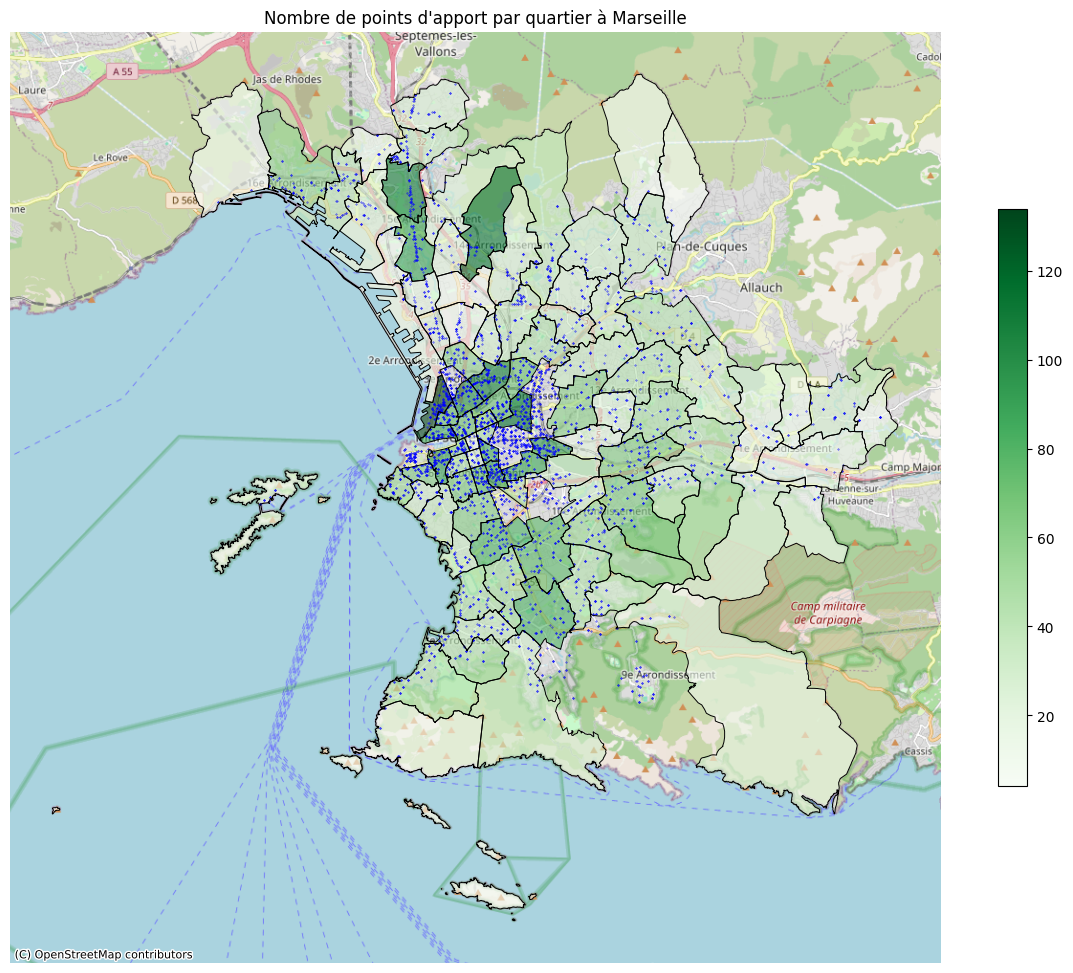

In [173]:
base = gdf_marseille.boundary.plot(edgecolor = 'black', linewidth = 0.7, figsize = (15,15))

gdf_marseille.plot(
    ax = base,
    column = 'nb_points',
    cmap = 'Greens',
    alpha = 0.6,
    legend = True,
    legend_kwds={'shrink': 0.5})

bacs_marseille_quartiers.plot(
    ax = base,
    color = 'Blue',
    markersize = 0.1

)

ctx.add_basemap(ax = base, source = ctx.providers.OpenStreetMap.Mapnik)

base.set_axis_off()

base.set_title("Nombre de points d'apport par quartier à Marseille");


In [179]:
map = folium.Map(
    location = [43.3, 5.4],
    tiles = 'OpenStreetMap',
    zoom_start = 12,
    max_zoom=23,
    control_scale=True)

bacs_marseille_quartiers.explore(
    m = map,
    marker_kwds=dict(radius=1, fill=True),
    color = 'Grey'
)

gdf_marseille.explore(
    m = map, 
    column = 'nb_points',
    tooltip = ['Quartier', 'nb_points'],
    popup = True,
    cmap = 'RdYlBu_r',
    legend = False)


map_title = "Nombre de points d'apports par quartier"
title_html = f'<h1 style="position:absolute;z-index:100000;left:40vw" >{map_title}</h1>'
map.get_root().html.add_child(folium.Element(title_html))


map.save(output_maps_path + 'map_nb_bacs_quartier.html')




## En fonction de la surface en km2

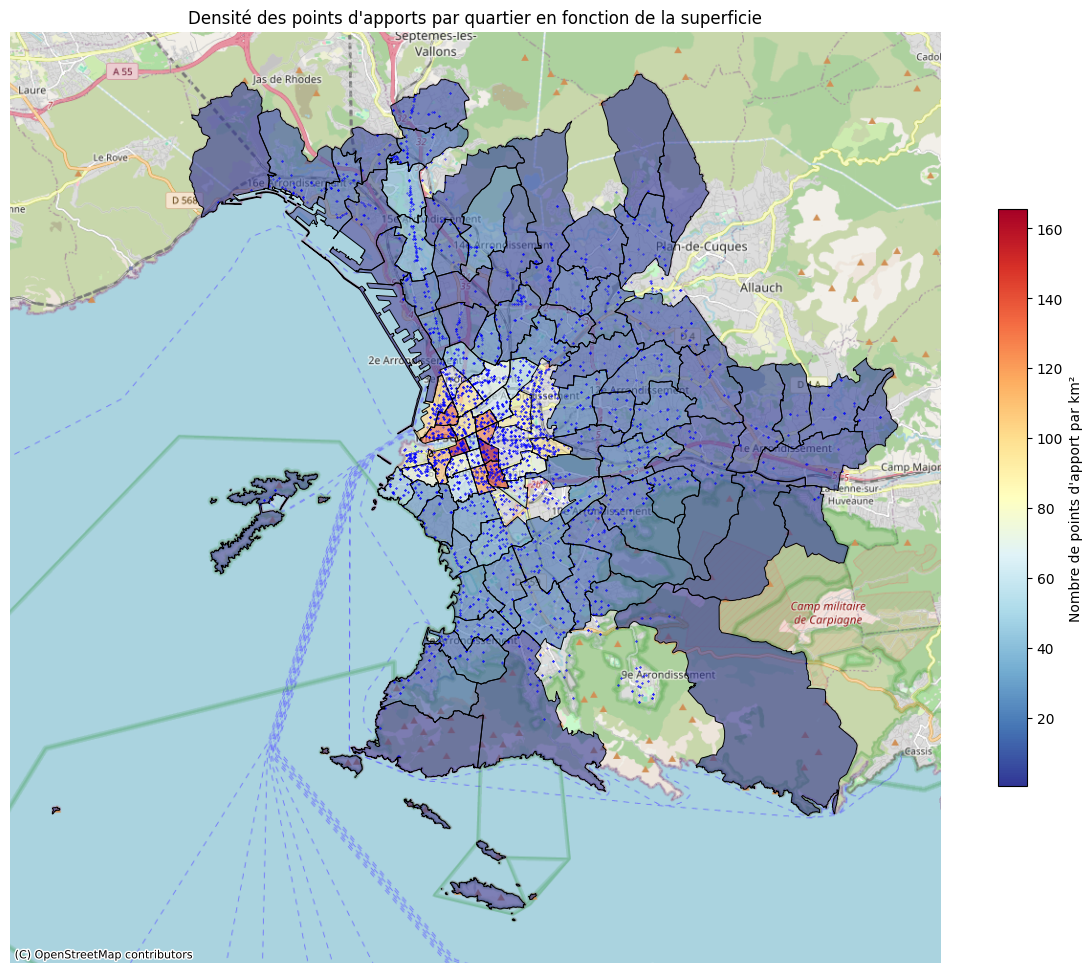

In [180]:
base = gdf_marseille.boundary.plot(edgecolor = 'black', linewidth = 0.7, figsize = (15,15))

gdf_marseille.plot(
    ax = base,
    column = 'densite_bacs',
    cmap = 'RdYlBu_r',
    alpha = 0.6,
    legend = True,
    label = "Nombre de points d'apport par km²",
    legend_kwds={'shrink': 0.5,
                 'label':'Nombre de points d\'apport par km²'}
    )


bacs_marseille_quartiers.plot(
    ax = base,
    color = 'Blue',
    markersize = 0.1

)

ctx.add_basemap(ax = base, source = ctx.providers.OpenStreetMap.Mapnik)

base.set_axis_off()

base.set_title("Densité des points d'apports par quartier en fonction de la superficie");


In [181]:
map = folium.Map(
    location = [43.3, 5.4],
    tiles = 'OpenStreetMap',
    zoom_start = 12,
    max_zoom=23,
    control_scale=True)

bacs_marseille_quartiers.explore(
    m = map,
    marker_kwds=dict(radius=1, fill=True),
    color = 'Grey'
)

gdf_marseille.explore(
    m = map, 
    column = 'densite_bacs',
    tooltip = ['Quartier', 'nb_points'],
    popup = True,
    cmap = 'RdYlBu_r',
    legend = False)

map_title = "Densité des points d'apports par quartier"
title_html = f'<h1 style="position:absolute;z-index:100000;left:40vw" >{map_title}</h1>'
map.get_root().html.add_child(folium.Element(title_html))


map.save(output_maps_path + 'map_densite_bacs_quartier_km2.html')


## En fonction de la densité de population

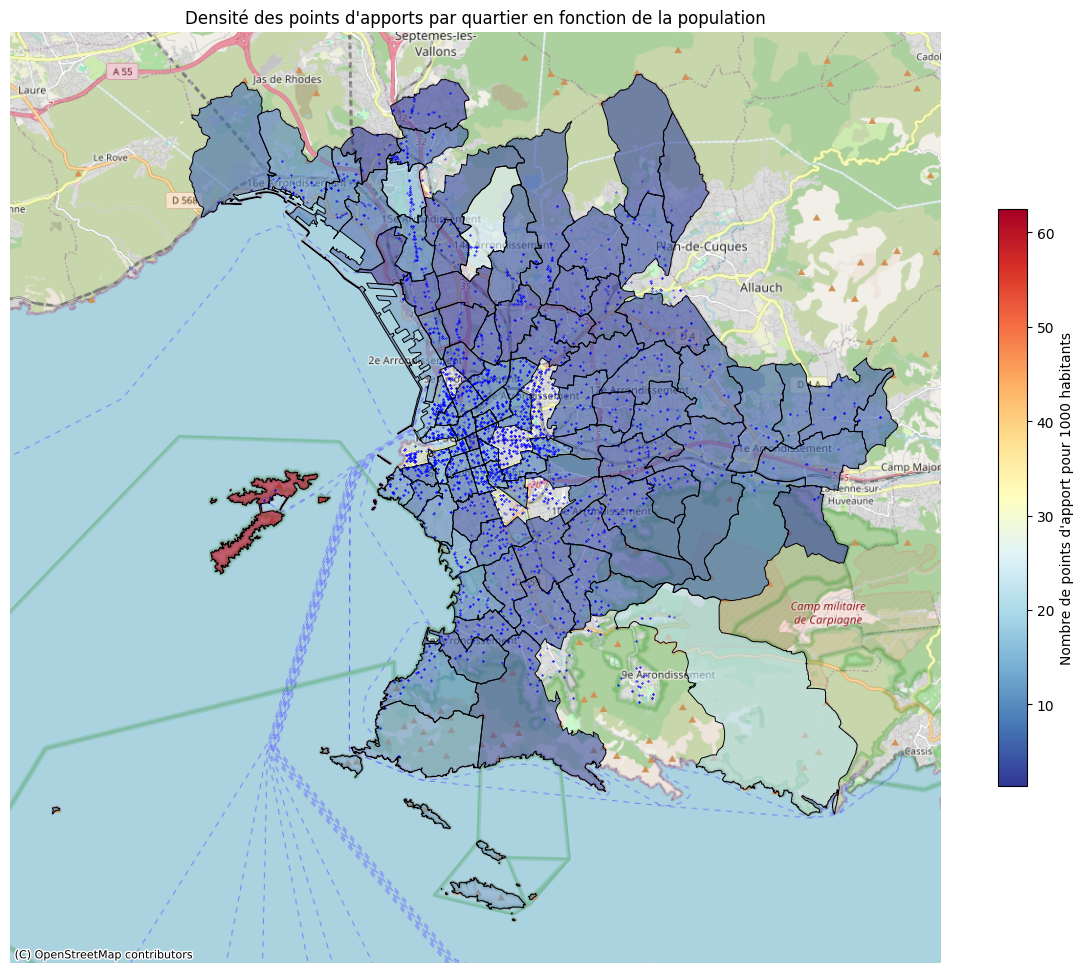

In [177]:
base = gdf_marseille.boundary.plot(edgecolor = 'black', linewidth = 0.7, figsize = (15,15))

gdf_marseille.plot(
    ax = base,
    column = 'densite_bacs_pop',
    cmap = 'RdYlBu_r',
    alpha = 0.6,
    legend = True,
    label = "Nombre de points d'apport pour 1000 habitants",
    legend_kwds={'shrink': 0.5,
                 'label':'Nombre de points d\'apport pour 1000 habitants'}
    )


bacs_marseille_quartiers.plot(
    ax = base,
    color = 'Blue',
    markersize = 0.1

)

ctx.add_basemap(ax = base, source = ctx.providers.OpenStreetMap.Mapnik)

base.set_axis_off()

base.set_title("Densité des points d'apports par quartier en fonction de la population");

In [182]:
map = folium.Map(
    location = [43.3, 5.4],
    tiles = 'OpenStreetMap',
    zoom_start = 12,
    max_zoom=23,
    control_scale=True)

bacs_marseille_quartiers.explore(
    m = map,
    marker_kwds=dict(radius=1, fill=True),
    color = 'Grey'
)

gdf_marseille.explore(
    m = map, 
    column = 'densite_bacs_pop',
    tooltip = ['Quartier', 'nb_points'],
    popup = True,
    cmap = 'RdYlBu_r',
    legend = False)

map_title = "Densité des points d'apports par quartier selon la population"
title_html = f'<h1 style="position:absolute;z-index:100000;left:40vw" >{map_title}</h1>'
map.get_root().html.add_child(folium.Element(title_html))


map.save(output_maps_path + 'map_densite_bacs_quartier_pop.html')
